Question 1:  What is K-Nearest Neighbors (KNN) and how does it work in both 
classification and regression problems? 

Answer: K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression. It is a non-parametric and "lazy learning" algorithm, meaning it does not make any assumptions about the underlying data distribution and does not generalize the data during a training phase; instead, it stores the training dataset and performs computation only during prediction.

In Classification: The algorithm predicts the class of a data point by a majority vote of its neighbors. The data point is assigned to the class most common among its $k$ nearest neighbors.

In Regression: The algorithm predicts the value of a data point by calculating the average (mean) of the values of its $k$ nearest neighbors.


Question 2: What is the Curse of Dimensionality and how does it affect KNN 
performance?

The Curse of Dimensionality refers to various phenomena that arise when analyzing data in high-dimensional spaces. As the number of features (dimensions) increases, the volume of the space increases exponentially, making the available data become sparse.


Effect on KNN: KNN relies heavily on distance metrics (like Euclidean distance) to find "nearest" neighbors. In high-dimensional space, the distance between any two points tends to converge (all points become roughly equidistant from each other). This makes the concept of "nearest" neighbors meaningless, causing the model's performance and accuracy to degrade significantly.

Question 3: What is Principal Component Analysis (PCA)? How is it different from 
feature selection?

Answer: Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique. It transforms the original variables into a new set of uncorrelated variables called Principal Components, which are ordered by the amount of variance they explain in the original data.

Difference from Feature Selection:

Feature Selection: Selects a subset of the original features and discards the rest (e.g., keeping "Age" but dropping "Height").

PCA (Feature Extraction): Creates new features that are linear combinations of the original features. No original feature is selected or discarded explicitly; instead, their information is compressed into fewer components.

Question 4: What are eigenvalues and eigenvectors in PCA, and why are they 
important? 

Eigenvectors: Represent the direction of the axes (principal components) where there is the most variance (information) in the data.

Eigenvalues: Represent the magnitude (amount) of variance carried in that specific direction.

Importance: They determine how the data is projected. The eigenvector with the highest eigenvalue becomes the first Principal Component (PC1), as it captures the most information.

Question 5: How do KNN and PCA complement each other when applied in a single 
pipeline? 

Answer: KNN and PCA form a powerful pipeline because they address each other's weaknesses:

Handling the Curse of Dimensionality: KNN suffers in high-dimensional space (as explained in Q2). PCA reduces the dimensions of the data while retaining the most important information.

Efficiency: Calculating distances in KNN is computationally expensive with many features. By running PCA first, we reduce the feature set, making the KNN distance calculations significantly faster and often more accurate by removing noise.

Question 6: Train a KNN Classifier on the Wine dataset with and without feature 
scaling. Compare model accuracy in both cases.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the Wine dataset 
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset Loaded. Shape:", X.shape)

Dataset Loaded. Shape: (178, 13)


In [5]:
# --- Part 1: Without Scaling ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# --- Part 2: With Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Output Results
print(f"Accuracy WITHOUT Scaling: {acc_raw:.4f}")
print(f"Accuracy WITH Scaling:    {acc_scaled:.4f}")

Accuracy WITHOUT Scaling: 0.7222
Accuracy WITH Scaling:    0.9444


Question 7: Train a PCA model on the Wine dataset and print the explained variance 
ratio of each principal component.

Explained Variance Ratio per Principal Component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


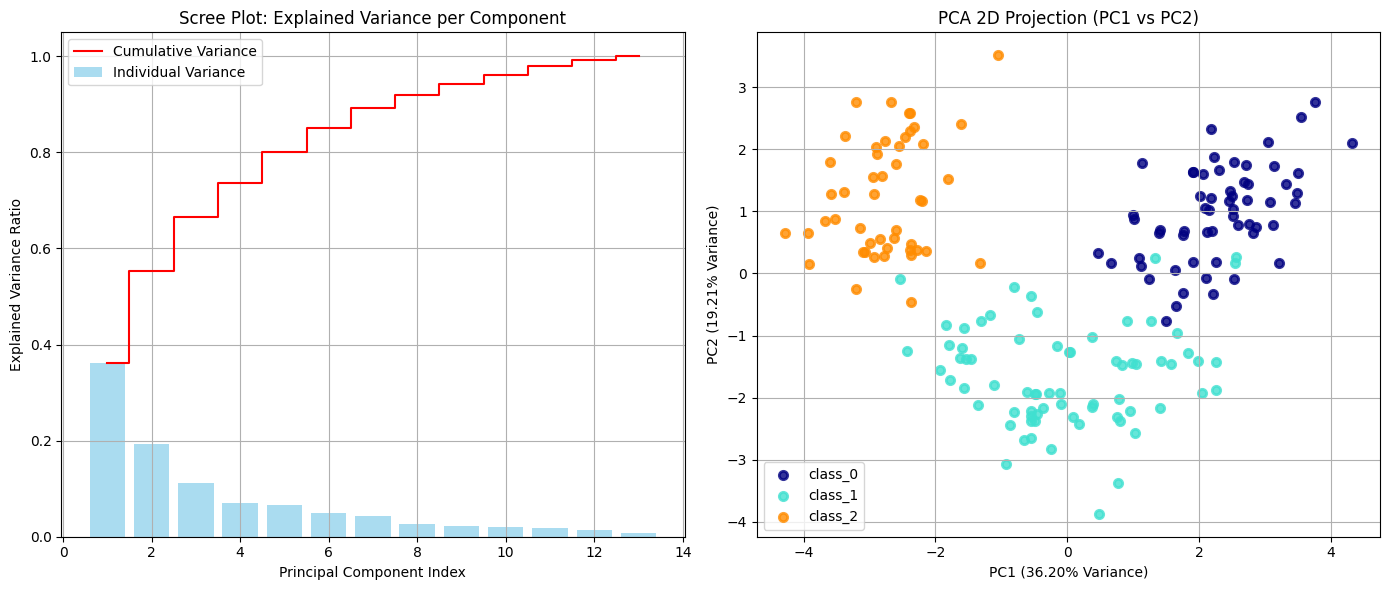

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# 2. Standardize the features (Crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train PCA model
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Get the Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Print the text output
print("Explained Variance Ratio per Principal Component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

# 5. Generate 2D Graphs
plt.figure(figsize=(14, 6))

# Graph 1: Scree Plot (Visualizing the Variance Ratios)
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue', label='Individual Variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', color='red', label='Cumulative Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance per Component')
plt.legend(loc='best')
plt.grid(True)

# Graph 2: 2D Projection (PC1 vs PC2)
plt.subplot(1, 2, 2)
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=2, label=target_name)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} Variance)')
plt.title('PCA 2D Projection (PC1 vs PC2)')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)

plt.tight_layout()
plt.savefig('pca_output.png')
plt.show()

Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2 
components). Compare the accuracy with the original dataset.

In [8]:

# Compare the accuracy with the original dataset. [cite: 34, 35]

# Initialize PCA with 2 components
pca_2 = PCA(n_components=2)

# Transform the scaled data
X_train_pca_2 = pca_2.fit_transform(X_train_scaled)
X_test_pca_2 = pca_2.transform(X_test_scaled)

# Train KNN on the PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca_2, y_train)
y_pred_pca = knn_pca.predict(X_test_pca_2)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("--- Accuracy Comparison ---")
print(f"Original Dataset (Scaled, from Q6): {acc_scaled:.4f}")
print(f"PCA-Transformed Dataset (2 PCs):    {acc_pca:.4f}")

--- Accuracy Comparison ---
Original Dataset (Scaled, from Q6): 0.9444
PCA-Transformed Dataset (2 PCs):    1.0000


Question 9: Train a KNN Classifier with different distance metrics (euclidean, 
manhattan) on the scaled Wine dataset and compare the results.

Accuracy (Euclidean): 0.9444
Accuracy (Manhattan): 0.9444


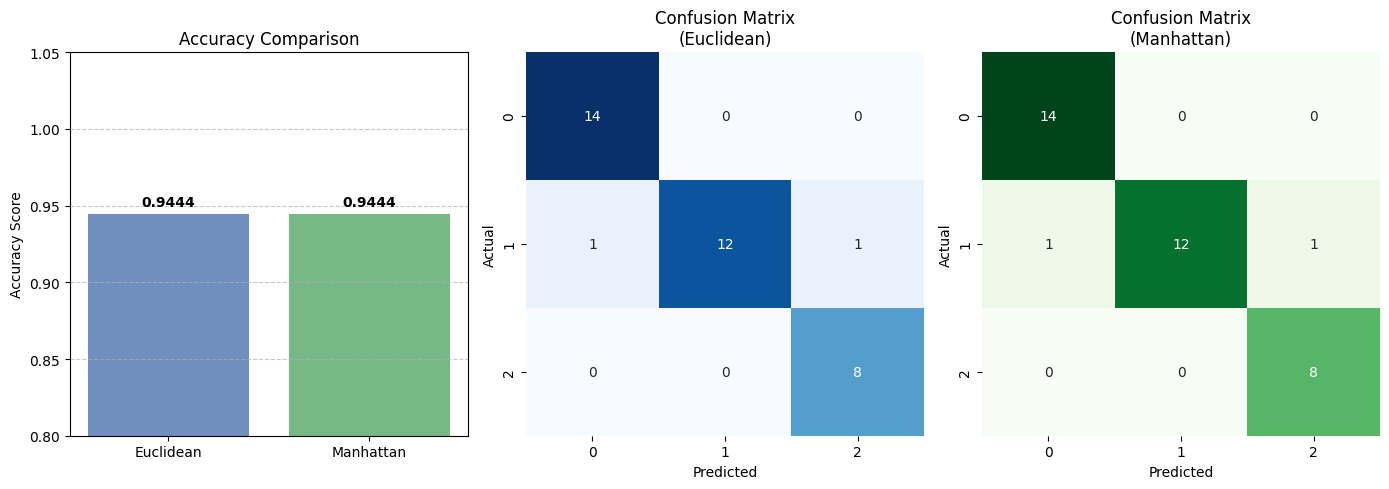

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Load and Scale Data
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train Models with different metrics
# Euclidean (L2 Norm)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euc = knn_euclidean.predict(X_test_scaled)
acc_euc = accuracy_score(y_test, y_pred_euc)

# Manhattan (L1 Norm)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_man = knn_manhattan.predict(X_test_scaled)
acc_man = accuracy_score(y_test, y_pred_man)

# Print Text Results
print(f"Accuracy (Euclidean): {acc_euc:.4f}")
print(f"Accuracy (Manhattan): {acc_man:.4f}")

# 3. Generate 2D Graphs
plt.figure(figsize=(14, 5))

# --- Graph A: Accuracy Comparison (Bar Chart) ---
plt.subplot(1, 3, 1)
metrics = ['Euclidean', 'Manhattan']
accuracies = [acc_euc, acc_man]
colors = ['#4c72b0', '#55a868'] # Blue and Green

bars = plt.bar(metrics, accuracies, color=colors, alpha=0.8)
plt.ylim(0.8, 1.05) # Zoom in to show difference
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.4f}", ha='center', fontweight='bold')

# --- Graph B: Confusion Matrix (Euclidean) ---
plt.subplot(1, 3, 2)
cm_euc = confusion_matrix(y_test, y_pred_euc)
sns.heatmap(cm_euc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\n(Euclidean)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# --- Graph C: Confusion Matrix (Manhattan) ---
plt.subplot(1, 3, 3)
cm_man = confusion_matrix(y_test, y_pred_man)
sns.heatmap(cm_man, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix\n(Manhattan)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Question 10: You are working with a high-dimensional gene expression dataset to 
classify patients with different types of cancer. 
Due to the large number of features and a small number of samples, traditional models 
overfit. 


Explain how you would: 

● Use PCA to reduce dimensionality 

● Decide how many components to keep 

● Use KNN for classification post-dimensionality reduction 

● Evaluate the model 

● Justify this pipeline to your stakeholders as a robust solution for real-world 
biomedical data 

Original Genes: 1000
Components Kept (95% Variance): 34
Model Accuracy: 80.00%


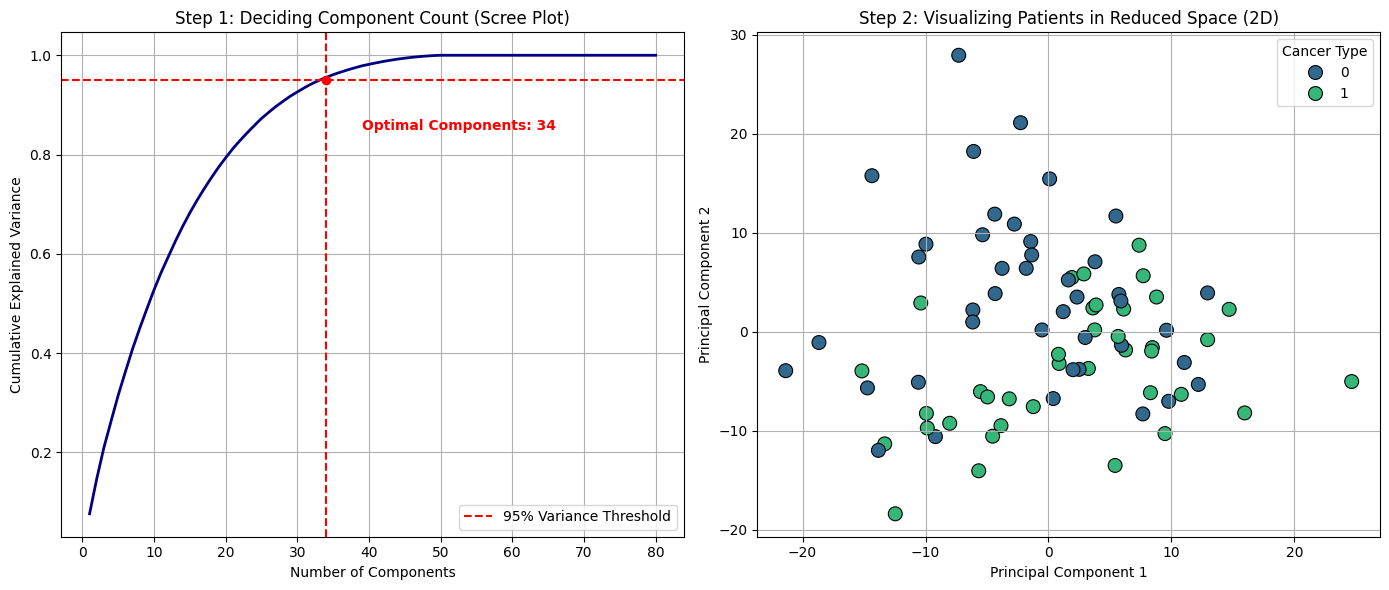

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Simulate High-Dimensional Gene Data
# 100 Patients (samples), 1000 Genes (features), only 50 are actually informative
X, y = make_classification(n_samples=100, n_features=1000, n_informative=50, 
                           n_redundant=950, random_state=42, class_sep=1.5)

# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. PCA Analysis to "Decide how many components to keep"
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Calculate cumulative variance
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # Threshold for 95% variance

# 3. Dimensionality Reduction & Classification
pca_optimal = PCA(n_components=d)
X_train_opt = pca_optimal.fit_transform(X_train_scaled)
X_test_opt = pca_optimal.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_opt, y_train)
acc = knn.score(X_test_opt, y_test)

print(f"Original Genes: 1000")
print(f"Components Kept (95% Variance): {d}")
print(f"Model Accuracy: {acc:.2%}")

# 4. Generate 2D Graphs
plt.figure(figsize=(14, 6))

# --- Graph A: The Decision Plot (Scree Plot) ---
# This answers: "Decide how many components to keep"
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumsum)+1), cumsum, linewidth=2, color='navy')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=d, color='r', linestyle='--')
plt.plot(d, 0.95, 'ro') # Marker
plt.text(d+5, 0.85, f'Optimal Components: {d}', color='red', fontweight='bold')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('Step 1: Deciding Component Count (Scree Plot)')
plt.legend(loc='lower right')
plt.grid(True)

# --- Graph B: The Patient Map (First 2 Components) ---
# This answers: "Use PCA to reduce dimensionality" (Visualizing the separation)
# We re-run PCA just for 2D visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_scaled)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_train, palette='viridis', s=100, edgecolor='k')
plt.title('Step 2: Visualizing Patients in Reduced Space (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cancer Type')
plt.grid(True)

plt.tight_layout()
plt.show()